In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')
sns.set_color_codes()

In [2]:
# Throw out MH17 as it's the only keyword which is missing a whole month
keywords = ['africa', 'allah', 'apple', 'arab', 'asylum', 'attack', 'banana', 'birds', 'bitcoin', 'black', 
            'boston', 'christian', 'climate', 'coffee', 'comet', 'crimea', 'crowded', 'curiosity', 'divorce',
            'doomsday', 'ebola', 'epidemic', 'ethiopia', 'europe', 'facebook', 'family', 'flu', 'foreigners',
            'galaxy', 'geneva', 'gluten', 'god', 'google', 'guinea', 'higgs', 'holidays', 'homework', 'hurricane',
            'immigration', 'influenza', 'iphone', 'isis', 'islam', 'italy', 'jogging', 'left', 'leone', 'liberia',
            'linux', 'london', 'mandela', 'marathon', 'marriage', 'maya', 'meat', 'mh370', 'migrants', 'nelson',
            'nsa', 'obama', 'olympics', 'pasta', 'pc', 'philippines', 'pig', 'pope', 'putin', 'refugees', 'right',
            'rosetta', 'russia', 'sandy', 'school', 'sierra', 'snowden', 'sochi', 'sports', 'spring', 'swine',
            'syria', 'tea', 'teacher', 'television', 'terrorism', 'twitter', 'ukraine', 'unemployment', 'unhcr',
            'usa', 'vaccine', 'vegan', 'vegetarian', 'virus', 'watch', 'wedding', 'whatsapp', 'white', 'who', 'work']

In [3]:
def fill_arrays(dates_holes, values_holes):
    min_date = np.min(dates_holes)
    max_date = np.max(dates_holes)
        
    dates_continuous = np.arange(0, max_date+1)
    values_continous = np.zeros_like(dates_continuous)
    values_continous[dates_holes] = values_holes
    
    dates_continuous = dates_continuous[min_date:]
    values_continous = values_continous[min_date:]
    
    return dates_continuous, values_continous


def add_duplicated_values(dates_wdoubles, values_wdoubles):
    ar, indices, inverse, counts = np.unique(dates_wdoubles, return_index=True, return_inverse=True, return_counts=True)
    doubles = np.where(counts > 1)[0]

    dates_reduced = dates_wdoubles[indices]
    values_reduced = values_wdoubles[indices]

    for i in range(doubles.size):
        doubles_indices = np.where(inverse == doubles[i])[0]
        values_reduced[doubles[i]] = np.sum(values_wdoubles[doubles_indices])
        
    return np.array(dates_reduced, dtype=np.int), np.array(values_reduced, dtype=np.int)
    

def get_dates_values(keyword, datapath='../data/', fformat='.csv', ignored_dates=[]):
    dates = []
    values = []
    
    with open(datapath+keyword+fformat, 'r') as f:
        while True:
            line = f.readline()
            if line == '':
                break
            
            date_tmp = int(line.split(',')[0])
            value_tmp = int(line.split(',')[1].rstrip('/n'))
            
            if not date_tmp in ignored_dates:
                dates += [date_tmp]
                values += [value_tmp]

    dates, values = add_duplicated_values(np.array(dates, dtype=np.int), np.array(values, dtype=np.int))

    return dates, values


def get_dates_values_filled(keyword, datapath='../data/', fformat='.csv', ignored_dates=[]):
    dates, values = get_dates_values(keyword, datapath=datapath, fformat=fformat, ignored_dates=ignored_dates)
    return fill_arrays(dates, values)

In [4]:
date_tmp, _ = get_dates_values(keywords[0])

dates_all = np.zeros((len(keywords), date_tmp.size))
values_all = np.zeros((len(keywords), date_tmp.size))

for i, key in enumerate(keywords):
    dates_all[i], values_all[i] = get_dates_values(key)

In [5]:
indices_below = np.zeros(0)

for i, key in enumerate(keywords):
    mean = np.mean(values_all[i])
    std = np.std(values_all[i])
    mask = values_all[i] > mean - std
    print('{:}: Values above Mean - Std: {:.2f}%'.format(key, float(values_all[i][mask].size) / float(values_all[i].size)*100))
    
    indices = np.where(values_all[i] <= mean - std)[0]
    indices_below = np.append(indices_below, indices)

africa: Values above Mean - Std: 91.43%
allah: Values above Mean - Std: 95.43%
apple: Values above Mean - Std: 98.29%
arab: Values above Mean - Std: 94.29%
asylum: Values above Mean - Std: 92.00%
attack: Values above Mean - Std: 96.00%
banana: Values above Mean - Std: 93.71%
birds: Values above Mean - Std: 89.71%
bitcoin: Values above Mean - Std: 88.00%
black: Values above Mean - Std: 96.57%
boston: Values above Mean - Std: 92.57%
christian: Values above Mean - Std: 94.29%
climate: Values above Mean - Std: 98.29%
coffee: Values above Mean - Std: 94.86%
comet: Values above Mean - Std: 100.00%
crimea: Values above Mean - Std: 99.43%
crowded: Values above Mean - Std: 92.00%
curiosity: Values above Mean - Std: 89.14%
divorce: Values above Mean - Std: 96.57%
doomsday: Values above Mean - Std: 80.00%
ebola: Values above Mean - Std: 100.00%
epidemic: Values above Mean - Std: 99.43%
ethiopia: Values above Mean - Std: 86.86%
europe: Values above Mean - Std: 96.00%
facebook: Values above Mean - 

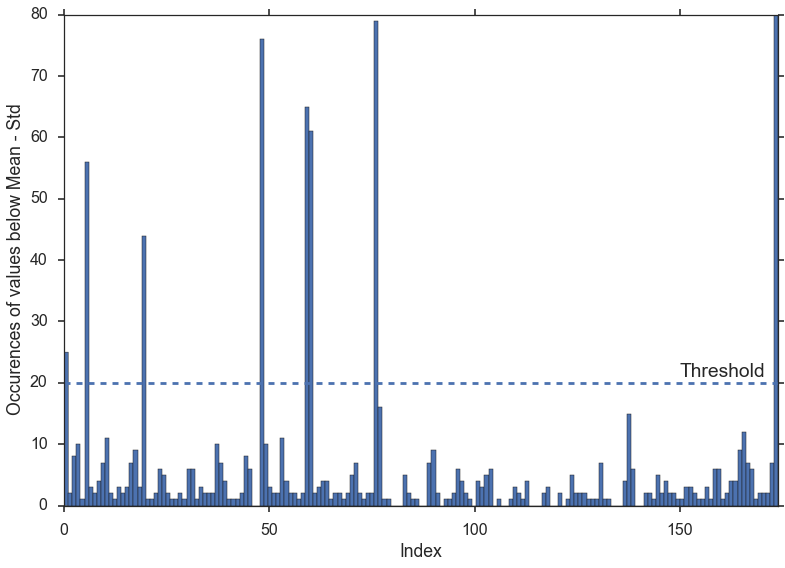

In [6]:
length = dates_all[0].size
_, _, _ = plt.hist(indices_below, bins=int(length), range=[-1e-6, length-1+1e-6])
plt.axhline(20, linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Occurences of values below Mean - Std')
plt.xlim(-1e-6, length-1+1e-6)
plt.text(150, 21, 'Threshold')

Get dates above threshold

In [7]:
ar, indices, counts = np.unique(indices_below, return_index=True, return_inverse=False, return_counts=True)
mask = counts >= 20
dates_above = np.array(dates_all[0][np.array(ar[mask], dtype=np.int)], dtype=np.int)

In [8]:
print(dates_above)

[2014121 2014126 2014140 2014169 2014192 2014197 2014213 2014341]


Visualize which days may not be complete

In [9]:
date_tmp, _ = get_dates_values_filled(keywords[0])

dates_all = np.zeros((len(keywords), date_tmp.size))
values_all = np.zeros((len(keywords), date_tmp.size))

for i, key in enumerate(keywords):
    dates_all[i], values_all[i] = get_dates_values_filled(key)

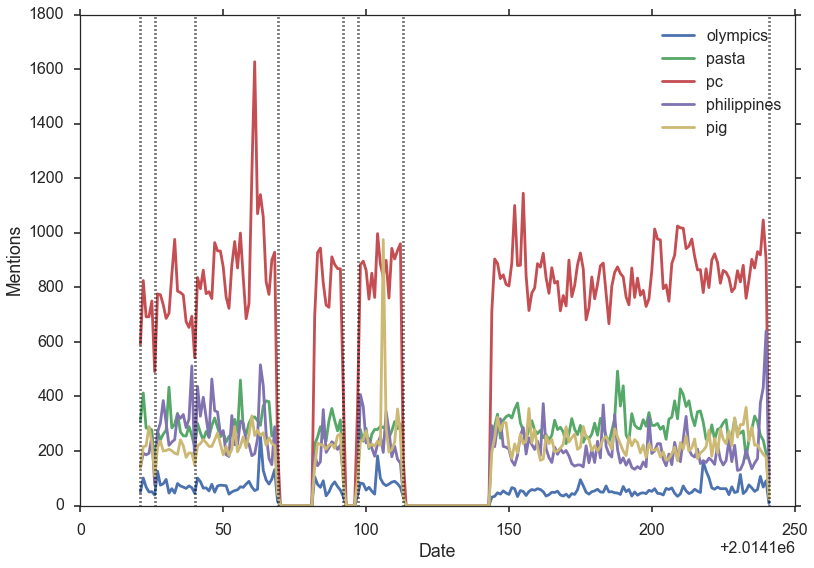

In [10]:
for i in range(60, 65):
    plt.plot(dates_all[i], values_all[i], label=keywords[i])

for date in dates_above:
    plt.axvline(date, color='black', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Mentions')
    
plt.legend()

Modify keywords adding the double entries and removing incomplete days

In [11]:
keywords_all = keywords + ['mh17']

for i, key in enumerate(keywords_all):
    dates, values = get_dates_values(key, datapath='../data/', fformat='.csv', ignored_dates=dates_above)

    os.remove('../data/'+key+'.csv')
    os.system('touch '+'../data/'+key+'.csv')
    
    for j in range(dates.size):
        os.system('echo "{:.0f},{:.0f}" >> {:}'.format(dates[j], values[j], '../data/'+key+'.csv'))

Add completeness.csv (now trivial with only 1)

In [12]:
dates, _ = get_dates_values(keywords_all[0], datapath='../data/', fformat='.csv', ignored_dates=dates_above)

os.remove('../data/completeness.csv')
os.system('touch '+'../data/completeness.csv')

values = np.ones(dates.size, dtype=np.int)

for j in range(dates.size):
    os.system('echo "{:.0f},{:.0f}" >> {:}'.format(dates[j], values[j], '../data/completeness.csv'))